In [1]:
import numpy as np
import pandas as pd

input_file = "../data/network_backup_dataset.csv"
df = pd.read_csv(input_file, header = 0)
labels = df.columns
for i, v in enumerate(labels):
    print "labels[" + str(i) + "] => " + v

labels[0] => Week #
labels[1] => Day of Week
labels[2] => Backup Start Time - Hour of Day
labels[3] => Work-Flow-ID
labels[4] => File Name
labels[5] => Size of Backup (GB)
labels[6] => Backup Time (hour)


In [19]:
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

def OneHotEncoding(label, data):
    tmpData = pd.get_dummies(data,columns=[str(label)])
    return tmpData

In [3]:
for i in range(5):
    df = OneHotEncoding(labels[i], df)

In [4]:
# get the rmse
def get_rmse(target, predict):
    n = len(predict)
    total = sum([(target[i] - predict[i])**2 for i in range(n)])
    return (total / n) ** 0.5

In [5]:
%%capture

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold

n_splits = 10
kf = KFold(n_splits = n_splits)

number_of_units = range(10, 300, 5)
activations = ['relu', 'logistic', 'tanh']
test_rmse = []

for activation in activations:
    rmse_out = []
    test_rmse.append(rmse_out)
    
    for num in number_of_units:
        rmse_in = []
        rmse_out.append(rmse_in)
        clf = MLPRegressor(alpha = 0.001, hidden_layer_sizes = (num, ), \
                           activation = activation, verbose = 'True', learning_rate = 'adaptive')
        rmse_ = 0 
        
        for train_index, test_index in kf.split(df):
            p = df.copy(False)
            train_set = p.iloc[train_index, :]
            test_set = p.iloc[test_index, :]
            
            train_target = train_set.pop(labels[5])
            train_set.pop(labels[6])
            test_target = test_set.pop(labels[5])
            test_set.pop(labels[6])
            
            clf.fit(train_set, train_target)
            predict = clf.predict(test_set)
            rmse_ += (get_rmse(predict, test_target.as_matrix()))**2
            
        rmse_in.append((rmse_ / n_splits)**0.5)

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_rmse(test_rmse):
    
    for i, activation in enumerate(activations):
        rmse = test_rmse[i]
        plt.plot(number_of_units, rmse, label = activation)
            
    # plt.xlabel('number of neighbors')
    # plt.ylabel('RMSE')
    plt.legend(loc = 1, fancybox = True, framealpha = 0.5, prop = {'size': 8})
    plt.show()

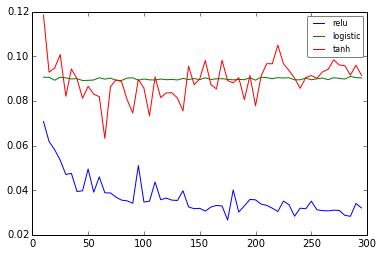

In [7]:
plot_rmse(test_rmse)

In [10]:
def plot_result(target, predict, title = ""):
    fig, ax = plt.subplots()
    ax.scatter(target, predict)
    ax.plot([min(target), max(target)], [min(target), max(target)], 'k--', lw = 4)
    ax.set_xlabel('Measured size', fontsize = 20)
    ax.set_ylabel('Predicted size', fontsize = 20)
    plt.title(title + ' Fitted values vs. Actual values')
    plt.show()
    
    fig, ax = plt.subplots()
    ax.scatter(predict, predict - target)
    ax.set_xlabel('Predicted size', fontsize = 20)
    ax.set_ylabel('Residual', fontsize = 20)
    plt.title(title + ' Residuals vs. Fitted value')
    plt.show()

In [21]:
%%capture

from sklearn.model_selection import cross_val_predict

# choose the number of units is 175 and the activation is relu
clf = MLPRegressor(alpha = 0.001, hidden_layer_sizes = (175, ), \
                           activation = 'relu', verbose = 'True', learning_rate = 'adaptive')

target = df.pop(labels[5])
df.pop(labels[6])
feature = df
predict = cross_val_predict(clf, feature, target, cv = 10)

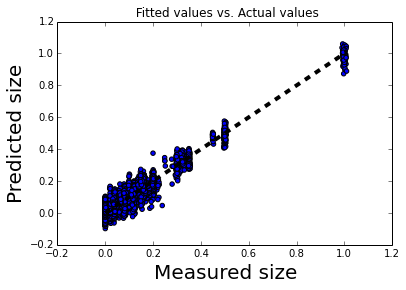

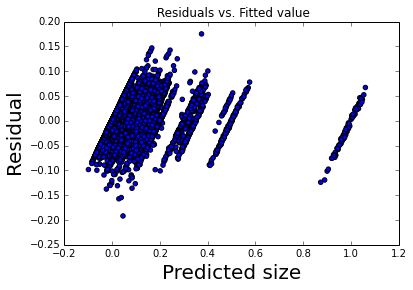

In [23]:
plot_result(target, predict)